# Uploading and Unzipping the dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"padmanabh03","key":"9c5bf7b26e7b13a2036c8a23ac13e3f3"}'}

In [2]:
import os
import json

# Create a directory for Kaggle and move the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verify Kaggle setup by listing available datasets
!kaggle datasets list

401 - Unauthorized - Unauthenticated


In [3]:
# Download the dataset
!kaggle datasets download -d emmarex/plantdisease

# List files to confirm download
!ls

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
100% 657M/658M [00:06<00:00, 187MB/s]
100% 658M/658M [00:06<00:00, 101MB/s]
kaggle.json  plantdisease.zip  sample_data


In [4]:
import zipfile

zip_filename = 'plantdisease.zip'

# Unzip the dataset
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('plantdisease')

print("Dataset extracted successfully.")

Dataset extracted successfully.


In [5]:
# List the contents of the extracted folder
!ls plantdisease

plantvillage  PlantVillage


In [6]:
# List contents of 'plantvillage'
print("Contents of 'plantvillage':")
!ls plantdisease/plantvillage

# List contents of 'PlantVillage'
print("\nContents of 'PlantVillage':")
!ls plantdisease/PlantVillage

Contents of 'plantvillage':
PlantVillage

Contents of 'PlantVillage':
Pepper__bell___Bacterial_spot  Tomato_Bacterial_spot  Tomato_Septoria_leaf_spot
Pepper__bell___healthy	       Tomato_Early_blight    Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Early_blight	       Tomato_healthy	      Tomato__Target_Spot
Potato___healthy	       Tomato_Late_blight     Tomato__Tomato_mosaic_virus
Potato___Late_blight	       Tomato_Leaf_Mold       Tomato__Tomato_YellowLeaf__Curl_Virus


In [7]:
import os

# Define the path to the PlantVillage directory
plantvillage_dir = 'plantdisease/PlantVillage'  # Change to 'plantdisease/plantvillage' if necessary

# Function to list classes and image counts
def verify_classes(directory):
    classes = os.listdir(directory)
    print(f"Number of classes: {len(classes)}")
    for cls in classes:
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            num_images = len(os.listdir(cls_path))
            print(f"  {cls}: {num_images} images")
        else:
            print(f"  {cls} is not a directory and will be skipped.")

# Verify classes
print("Verifying classes in PlantVillage:")
verify_classes(plantvillage_dir)

Verifying classes in PlantVillage:
Number of classes: 15
  Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
  Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 images
  Tomato_Bacterial_spot: 2127 images
  Pepper__bell___Bacterial_spot: 997 images
  Potato___Early_blight: 1000 images
  Tomato_Leaf_Mold: 952 images
  Pepper__bell___healthy: 1478 images
  Tomato__Tomato_mosaic_virus: 373 images
  Tomato_healthy: 1591 images
  Tomato_Early_blight: 1000 images
  Tomato__Target_Spot: 1404 images
  Potato___Late_blight: 1000 images
  Tomato_Septoria_leaf_spot: 1771 images
  Tomato_Late_blight: 1909 images
  Potato___healthy: 152 images


In [8]:
import shutil
import random

# Define base directory
base_dir = 'plantdisease'

# Define source directory
source_dir = os.path.join(base_dir, 'PlantVillage')  # Change to 'plantvillage' if necessary

# Define destination directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Define split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Ensure the destination directories exist
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

In [9]:
# Get list of classes
classes = [cls for cls in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, cls))]

# Create class subdirectories in train, validation, and test directories
for cls in classes:
    for directory in [train_dir, val_dir, test_dir]:
        cls_path = os.path.join(directory, cls)
        if not os.path.exists(cls_path):
            os.makedirs(cls_path)

In [10]:
# Function to split and copy images
def split_and_copy(source, train, val, test, train_ratio, val_ratio, test_ratio):
    # List all images in the source directory
    all_images = os.listdir(source)
    all_images = [img for img in all_images if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    # Shuffle the images
    random.shuffle(all_images)

    # Calculate split sizes
    total = len(all_images)
    train_size = int(total * train_ratio)
    val_size = int(total * val_ratio)
    test_size = total - train_size - val_size

    # Split the images
    train_images = all_images[:train_size]
    val_images = all_images[train_size:train_size + val_size]
    test_images = all_images[train_size + val_size:]

    # Function to copy images
    def copy_images(image_list, src, dst):
        for img in image_list:
            src_path = os.path.join(src, img)
            dst_path = os.path.join(dst, img)
            shutil.copy(src_path, dst_path)

    # Copy images to respective directories
    copy_images(train_images, source, train)
    copy_images(val_images, source, val)
    copy_images(test_images, source, test)

    print(f"Total images: {total}")
    print(f"Training: {len(train_images)}")
    print(f"Validation: {len(val_images)}")
    print(f"Test: {len(test_images)}\n")

# Iterate through each class and split the data
for cls in classes:
    print(f"Processing class: {cls}")
    source = os.path.join(source_dir, cls)
    train = os.path.join(train_dir, cls)
    val = os.path.join(val_dir, cls)
    test = os.path.join(test_dir, cls)
    split_and_copy(source, train, val, test, train_ratio, val_ratio, test_ratio)

Processing class: Tomato_Spider_mites_Two_spotted_spider_mite
Total images: 1676
Training: 1173
Validation: 251
Test: 252

Processing class: Tomato__Tomato_YellowLeaf__Curl_Virus
Total images: 3208
Training: 2245
Validation: 481
Test: 482

Processing class: Tomato_Bacterial_spot
Total images: 2127
Training: 1488
Validation: 319
Test: 320

Processing class: Pepper__bell___Bacterial_spot
Total images: 997
Training: 697
Validation: 149
Test: 151

Processing class: Potato___Early_blight
Total images: 1000
Training: 700
Validation: 150
Test: 150

Processing class: Tomato_Leaf_Mold
Total images: 952
Training: 666
Validation: 142
Test: 144

Processing class: Pepper__bell___healthy
Total images: 1478
Training: 1034
Validation: 221
Test: 223

Processing class: Tomato__Tomato_mosaic_virus
Total images: 373
Training: 261
Validation: 55
Test: 57

Processing class: Tomato_healthy
Total images: 1591
Training: 1113
Validation: 238
Test: 240

Processing class: Tomato_Early_blight
Total images: 1000
Tr

In [11]:
# Function to count images in a directory
def count_images(directory):
    count = 0
    for cls in os.listdir(directory):
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            count += len(os.listdir(cls_path))
    return count

print("Number of images in each set:")
print(f"Training set: {count_images(train_dir)} images")
print(f"Validation set: {count_images(val_dir)} images")
print(f"Test set: {count_images(test_dir)} images")

Number of images in each set:
Training set: 14440 images
Validation set: 3089 images
Test set: 3109 images


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Define image parameters
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 15  # Update this if you have a different number of classes

In [14]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation and test
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Create validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important for evaluation and predictions
)

Found 14440 images belonging to 15 classes.
Found 3089 images belonging to 15 classes.
Found 3109 images belonging to 15 classes.


In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

In [16]:
# Load the MobileNetV2 model without the top classification layers
base_model = MobileNetV2(
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),
    include_top=False,           # Exclude the top layers
    weights='imagenet'           # Use weights pre-trained on ImageNet
)

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# Define the input tensor
inputs = layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# Pass the inputs through the base model
x = base_model(inputs, training=False)

# Add global average pooling
x = layers.GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = layers.Dense(1024, activation='relu')(x)

# Add dropout for regularization
x = layers.Dropout(0.5)(x)

# Add the output layer with softmax activation for multi-class classification
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# Create the complete model
model = models.Model(inputs, outputs)

# Display the model architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │          15,375 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,585,103 (13.68 MB)

 Trainable params: 1,327,119 (5.06 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,                    # Stop after 10 epochs with no improvement
    restore_best_weights=True       # Restore model weights from the epoch with the best value
)

# ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint(
    'best_model.keras',                # File path to save the model
    monitor='val_loss',
    save_best_only=True,            # Save only the best model
    mode='min'                      # Save when the monitored quantity is minimized
)

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,                       # You can adjust the number of epochs based on performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 171s 350ms/step - accuracy: 0.4798 - loss: 1.6864 - val_accuracy: 0.8011 - val_loss: 0.6772
Epoch 2/50
  1/451 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6875 - loss: 1.0416

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


451/451 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6875 - loss: 1.0416 - val_accuracy: 0.7647 - val_loss: 0.7989
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 151s 330ms/step - accuracy: 0.7591 - loss: 0.7370 - val_accuracy: 0.8366 - val_loss: 0.5251
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.8438 - loss: 0.7124 - val_accuracy: 0.7059 - val_loss: 0.8090
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 151s 330ms/step - accuracy: 0.8034 - loss: 0.5905 - val_accuracy: 0.8428 - val_loss: 0.4767
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.8438 - loss: 0.4696 - val_accuracy: 0.8824 - val_loss: 0.5667
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 150s 327ms/step - accuracy: 0.8282 - loss: 0.5213 - val_accuracy: 0.8639 - val_loss: 0.4205
Epoch 8/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 77us/step - accuracy: 0.8750 - loss: 0.4133 - val_accuracy: 0.7059 - val_loss: 0.6882
Epoch 9/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 152s 331ms/step - accuracy: 0.8466 - loss: 0.4593 - val_accu

# Evaluating the Model on the Test Set

### Load the Best Saved Model


In [22]:
from tensorflow.keras.models import load_model

# Load the best saved model
model = load_model('best_model.keras')
print("Model loaded successfully.")


Model loaded successfully.


### Evaluate the Model

In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9077 - loss: 0.2933
Test Loss: 0.3605
Test Accuracy: 0.8832


# Visualizing Results

### Plot Training and Validation Accuracy and Loss

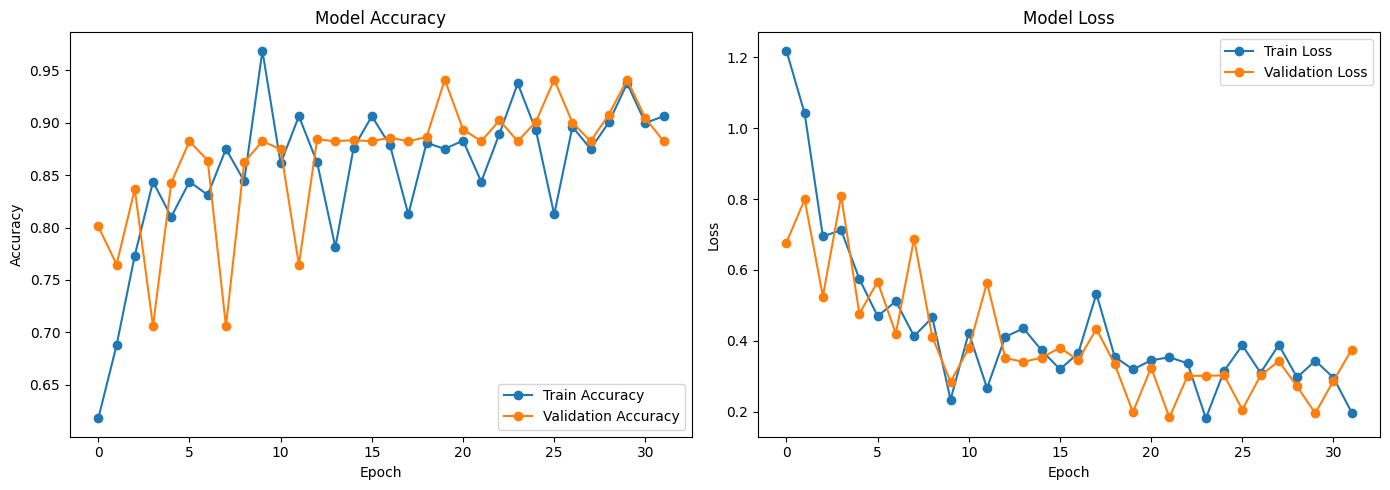

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Genrating Classification Report

In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step
Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.83      0.98      0.90       151
                     Pepper__bell___healthy       0.97      0.97      0.97       223
                      Potato___Early_blight       0.97      0.96      0.97       150
                       Potato___Late_blight       0.95      0.82      0.88       150
                           Potato___healthy       0.92      0.96      0.94        24
                      Tomato_Bacterial_spot       0.90      0.93      0.92       320
                        Tomato_Early_blight       0.74      0.61      0.67       150
                         Tomato_Late_blight       0.91      0.89      0.90       287
                           Tomato_Leaf_Mold       0.71      0.89      0.79       144
                  Tomato_Septoria_leaf_spot       0.86      0.84      0.85       267
T

### Plotting the Confusion Matrix

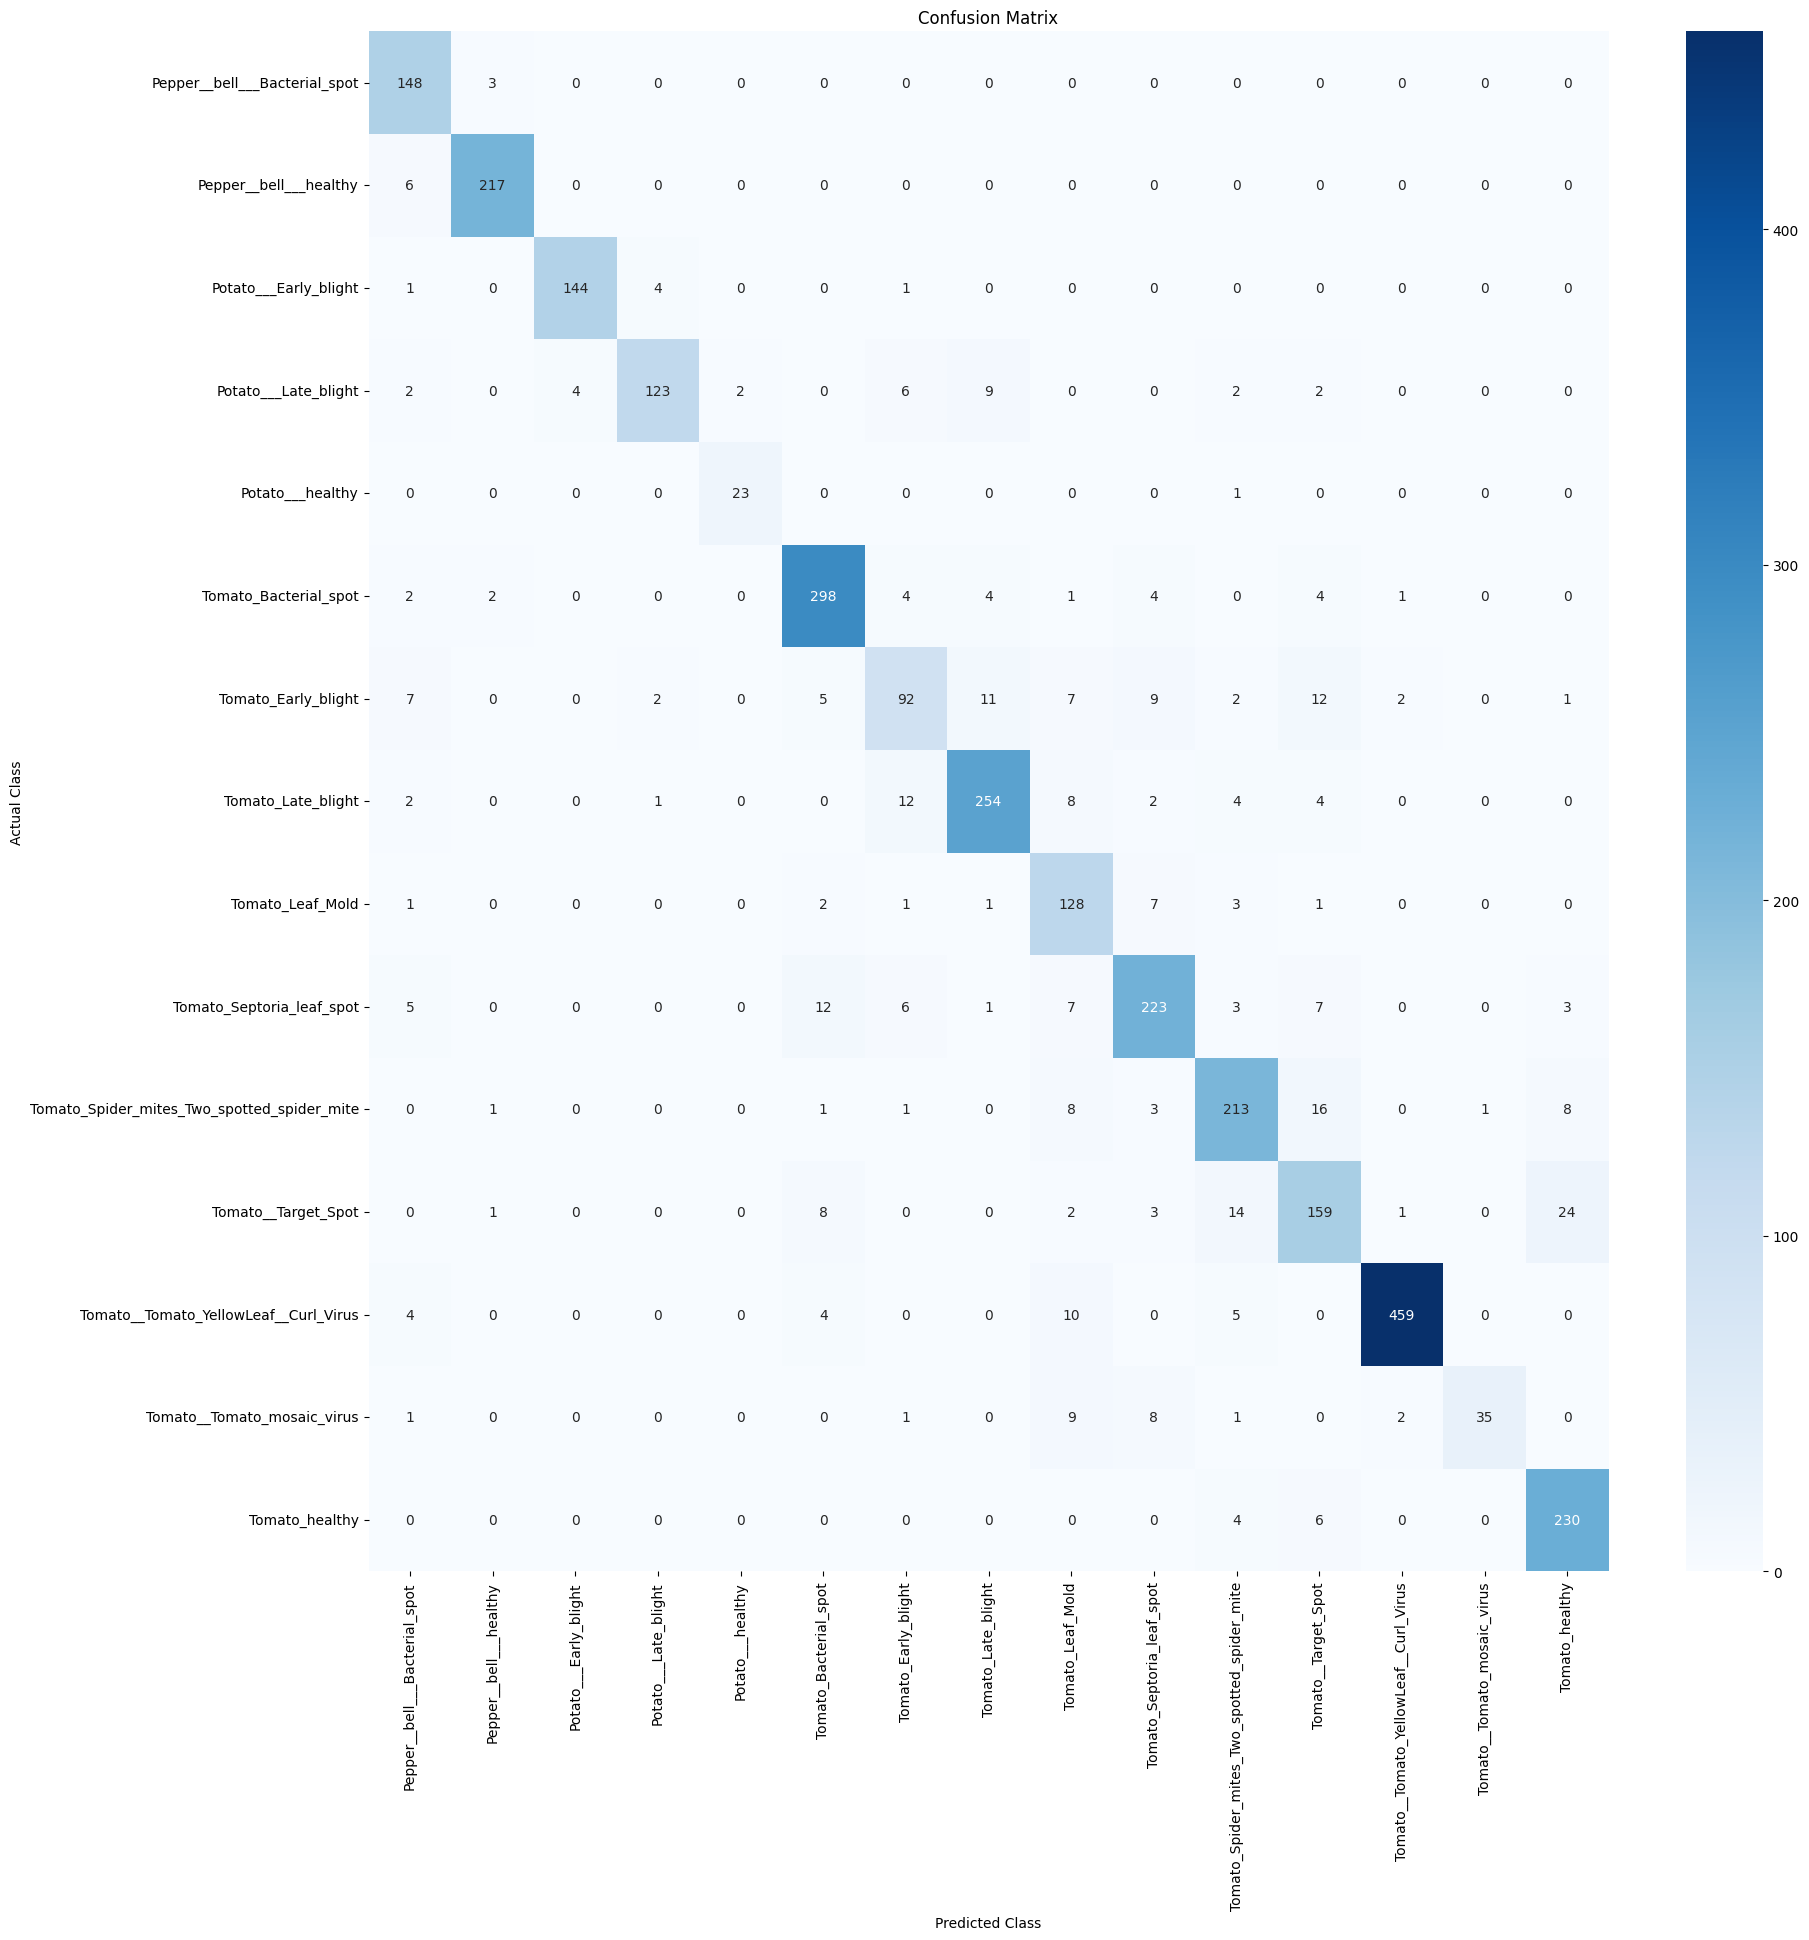

In [26]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()